In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load spreadsheet
xl = pd.ExcelFile('dataset_homemade.xlsx')

# Load a sheet into a DataFrame by name: df1
df = xl.parse('Sheet2')

In [3]:
df.tail()

,country,year,gdp_nominal - US$MM,gdp_per capita (usd),population,host_y,host_n,Index of Economic Freedom,no_of_internet_users,Gender gap index,number_sports_schools,Sports_budget- millions,Sports trainees,Rank,Olympics,GOLD,SILVER,BRONZE,total_No_of_medals
100,CRO,2000,21774.0,10582.668170,4505533,0,1,NaN,3063044,714.5,NaN,NaN,NaN,NaN,Summer,1,0,1,2
101,CUB,2000,NaN,6115.593942,11104313,0,1,NaN,4449238,716.9,NaN,NaN,NaN,NaN,Summer,11,11,7,29
102,NZL,2000,54138.0,21895.155980,3858032,0,1,NaN,4123439,751.0,NaN,NaN,NaN,NaN,Summer,1,0,3,4
103,CAN,2000,742319.0,32448.607640,30667365,0,1,NaN,32602776,716.5,NaN,NaN,NaN,NaN,Summer,3,3,8,14
104,IND,2000,476636.0,1648.208780,1053898107,0,1,NaN,500292635,601.1,NaN,NaN,NaN,NaN,Summer,0,0,1,1


In [4]:
df.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'number_sports_schools',
       'Sports_budget- millions', 'Sports trainees', 'Rank', 'Olympics',
       'GOLD', 'SILVER', 'BRONZE', 'total_No_of_medals'],
      dtype='object')

In [5]:
df.shape

(105, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
country                      105 non-null object
year                         105 non-null int64
gdp_nominal - US$MM          102 non-null float64
gdp_per capita (usd)         104 non-null float64
population                   105 non-null int64
host_y                       105 non-null int64
host_n                       105 non-null int64
Index of Economic Freedom    63 non-null float64
no_of_internet_users         105 non-null int64
Gender gap index             105 non-null float64
number_sports_schools        0 non-null float64
Sports_budget- millions      3 non-null float64
Sports trainees              0 non-null float64
Rank                         20 non-null float64
Olympics                     105 non-null object
GOLD                         105 non-null int64
SILVER                       105 non-null int64
BRONZE                       105 non-null int64
total_No_of_medals   

In [7]:
##columns dropped
df_new = df.iloc[:,np.r_[0:10,14:19]]

In [8]:
df_new.head()

,country,year,gdp_nominal - US$MM,gdp_per capita (usd),population,host_y,host_n,Index of Economic Freedom,no_of_internet_users,Gender gap index,Olympics,GOLD,SILVER,BRONZE,total_No_of_medals
0,USA,2016,18624475.0,59495.0,322179605,0,1,75.4,245436423,722.0,Summer,46,37,38,121
1,GBR,2016,2624529.0,43620.0,65788574,0,1,76.4,62354410,752.0,Summer,27,23,17,67
2,CHN,2016,11218281.0,16624.0,1403500365,0,1,52.0,746662194,676.0,Summer,26,18,26,70
3,RUS,2016,1527469.0,27890.0,146864513,0,1,50.6,110003284,691.0,Summer,19,17,19,55
4,GER,2016,3684816.0,50206.0,81914672,0,1,74.4,73436503,766.0,Summer,17,10,15,42


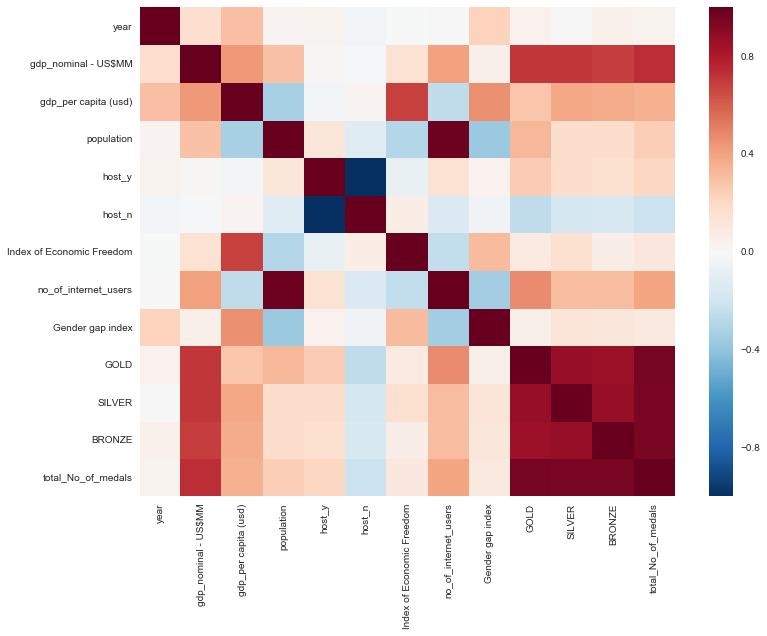

In [9]:
#correlation matrix
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

In [10]:
corr=df_new.corr()["total_No_of_medals"]
corr

year                         0.032971
gdp_nominal - US$MM          0.740916
gdp_per capita (usd)         0.358122
population                   0.249202
host_y                       0.212756
host_n                      -0.212756
Index of Economic Freedom    0.108904
no_of_internet_users         0.392146
Gender gap index             0.100406
GOLD                         0.959320
SILVER                       0.952456
BRONZE                       0.947980
total_No_of_medals           1.000000
Name: total_No_of_medals, dtype: float64

In [11]:
#plotting correlations

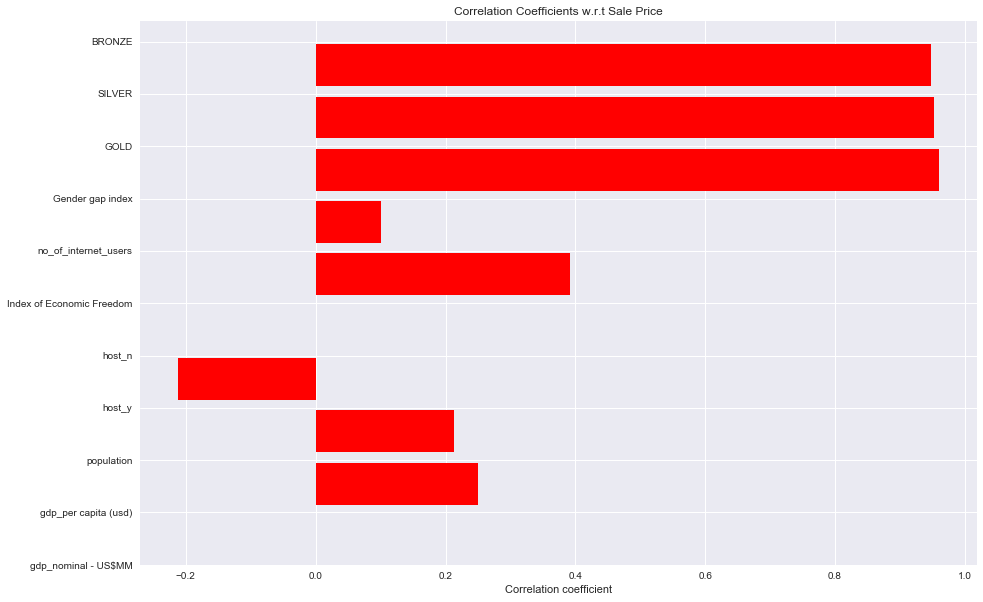

In [12]:
#plotting correlations
num_feat=df_new.columns[df_new.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df_new[col].values, df_new.total_No_of_medals.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,10))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Total no of medals");

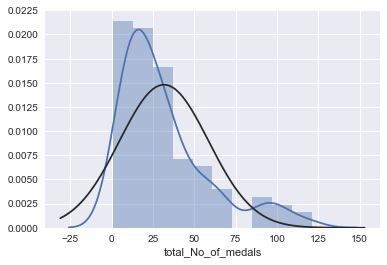

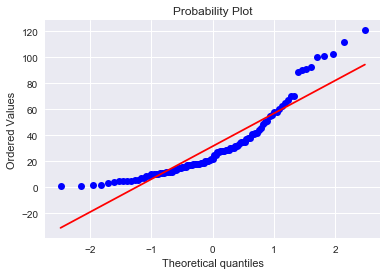

In [12]:
#Some data transformations
##Right Skewed
#histogram and normal probability plot
sns.distplot(df_new['total_No_of_medals'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['total_No_of_medals'], plot=plt)

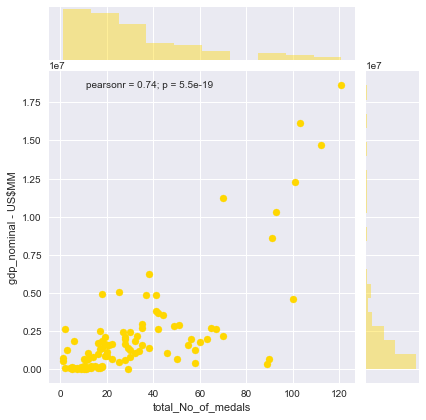

In [50]:
sns.jointplot(df_new['total_No_of_medals'],df_new['gdp_nominal - US$MM'],color='gold');

In [12]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm

In [13]:
null_counts = df_new.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of gdp_nominal - US$MM           3
gdp_per capita (usd)          1
Index of Economic Freedom    42
dtype: int64>

In [14]:
#Treating Missing Values
df_new['gdp_nominal - US$MM'].fillna(df_new['gdp_nominal - US$MM'].median(), inplace=True)

In [15]:
#Treating Missing Values
df_new['gdp_per capita (usd)'].fillna(df_new['gdp_per capita (usd)'].median(), inplace=True)

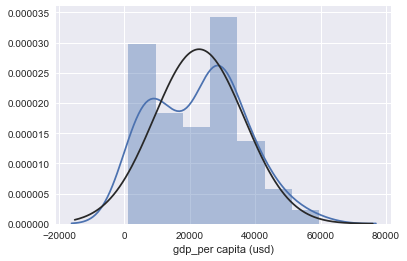

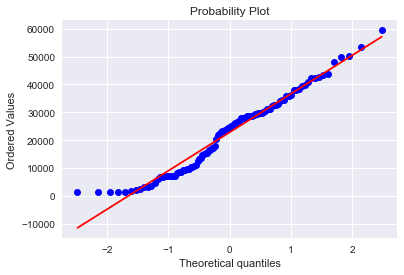

In [16]:
sns.distplot(df_new['gdp_per capita (usd)'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['gdp_per capita (usd)'], plot=plt)

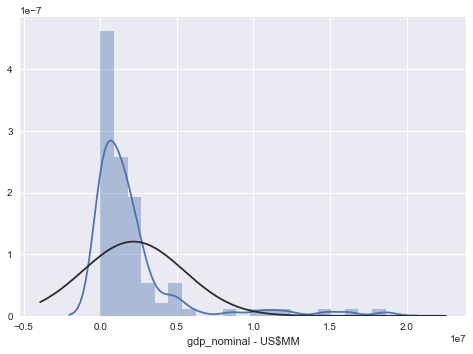

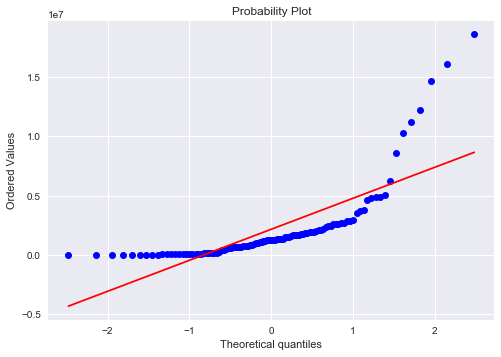

In [61]:
sns.distplot(df_new['gdp_nominal - US$MM'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['gdp_nominal - US$MM'], plot=plt)

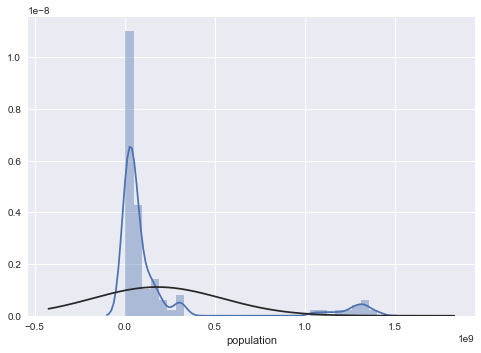

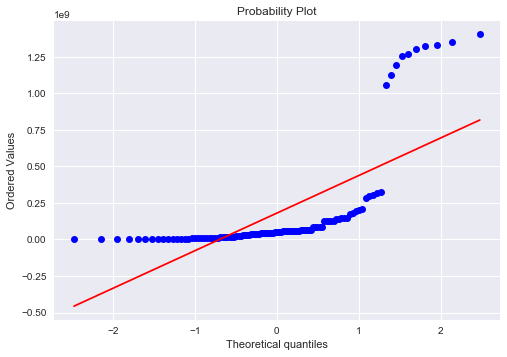

In [62]:
sns.distplot(df_new['population'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['population'], plot=plt)

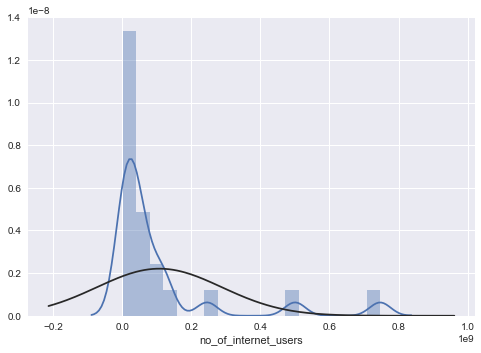

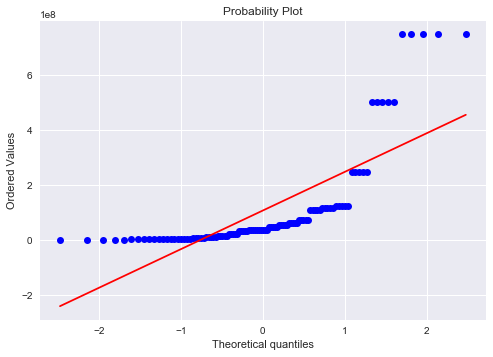

In [63]:
sns.distplot(df_new['no_of_internet_users'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['no_of_internet_users'], plot=plt)

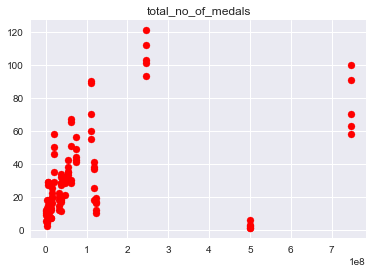

In [18]:
plt.scatter(df_new["no_of_internet_users"],df_new.total_No_of_medals, color='red')
plt.title("total_no_of_medals")

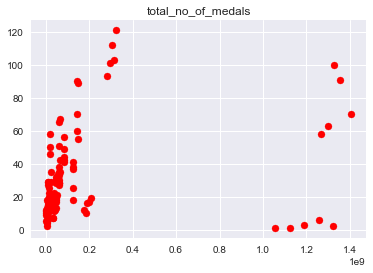

In [55]:
plt.scatter(df_new["population"],df_new.total_No_of_medals, color='red')
plt.title("total_no_of_medals")

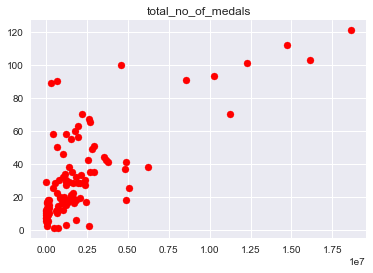

In [56]:
plt.scatter(df_new["gdp_nominal - US$MM"],df_new.total_No_of_medals, color='red')
plt.title("total_no_of_medals")

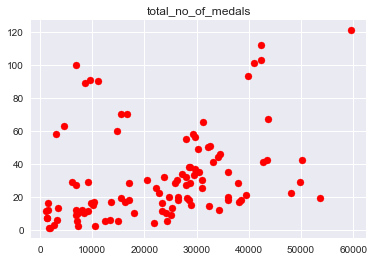

In [57]:
plt.scatter(df_new["gdp_per capita (usd)"],df_new.total_No_of_medals, color='red')
plt.title("total_no_of_medals")

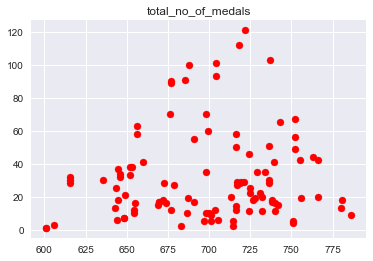

In [58]:
plt.scatter(df_new["Gender gap index"],df_new.total_No_of_medals, color='red')
plt.title("total_no_of_medals")

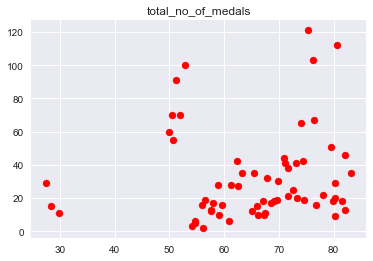

In [59]:
plt.scatter(df_new["Index of Economic Freedom"],df_new.total_No_of_medals, color='red')
plt.title("total_no_of_medals")

In [19]:
X = df_new[['no_of_internet_users','population','gdp_nominal - US$MM','gdp_per capita (usd)']] 
 

In [20]:
Y = df_new.iloc[:,-1]

In [ ]:
###multiple regression

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm

In [21]:
# with sklearn
regr = linear_model.LinearRegression()
x = regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 13.070931482726529
Coefficients: 
 [ 3.27468864e-07 -1.49657179e-07  3.29175957e-06  1.42670901e-04]


In [23]:
df_new.shape

(105, 15)

In [165]:
result = sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_No_of_medals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     145.6
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           5.20e-41
Time:                        22:37:13   Log-Likelihood:                -440.06
No. Observations:                 105   AIC:                             888.1
Df Residuals:                     101   BIC:                             898.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
no_of_internet_users  3.412e-07   5.23e-08      6.523      0.000    2.37e-07    4.45e-07
population           -1.452e-07   2.55e-08     -5.705      0.000   -1.96e-07   -9.47e-08
gdp_nominal - US$MM   2.488e-06   6.84e-07      3.636      0.000    1.13e-06    3.85e-06
gdp_per capita (usd)     0.0006   8.09e-05      7.296      0.000       0.000       0.001
==============================================================================
Omnibus:                       35.763   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.405
Skew:                           1.284   Prob(JB):                     7.74e-19
Kurtosis:                       6.531   Cond. No.                     2.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
df_new.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'Olympics', 'GOLD',
       'SILVER', 'BRONZE', 'total_No_of_medals'],
      dtype='object')

In [25]:
df_new.columns
df_1 = df_new.iloc[:,np.r_[2:7,8:10]].values


In [26]:
###Backward elimination approach to make optimal model
X1 = np.append(arr = np.ones((105,1)).astype(int), values = df_1, axis = 1)

In [27]:
x_1 = X1[:,[0,1,2,3,4,5,6,7]]

In [28]:
x = df_new[['no_of_internet_users','population','gdp_nominal - US$MM','host_n','Gender gap index']].values
y = df_new.iloc[:,-1].values

In [29]:
corr = np.corrcoef(x,rowvar=0)
corr

array([[ 1.        ,  0.97802742,  0.40880026, -0.14428339, -0.34515587],
       [ 0.97802742,  1.        ,  0.29737937, -0.12424288, -0.37060942],
       [ 0.40880026,  0.29737937,  1.        , -0.01578514,  0.05378809],
       [-0.14428339, -0.12424288, -0.01578514,  1.        , -0.04579491],
       [-0.34515587, -0.37060942,  0.05378809, -0.04579491,  1.        ]])

In [172]:
w,v = np.linalg.eig(corr)
w

array([2.35954303, 0.01443785, 0.56020941, 1.08221582, 0.98359388])

In [173]:
v[:,3]
v[:,4]


array([ 0.01360174, -0.03346345,  0.51814854,  0.83756998,  0.16939248])

In [174]:
reg_1 = sm.OLS(y,x_1).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     40.74
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           1.57e-24
Time:                        22:37:32   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             872.4
Df Residuals:                      98   BIC:                             891.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8578     18.519     -0.262      0.794     -41.609      31.893
x1          3.492e-06   6.65e-07      5.248      0.000    2.17e-06    4.81e-06
x2          7.761e-05      0.000      0.524      0.601      -0.000       0.000
x3         -1.422e-07   2.35e-08     -6.047      0.000   -1.89e-07   -9.55e-08
x4             7.3376     10.885      0.674      0.502     -14.264      28.939
x5           -12.1954      9.139     -1.334      0.185     -30.331       5.940
x6          3.108e-07   4.87e-08      6.386      0.000    2.14e-07    4.07e-07
x7             0.0442      0.040      1.112      0.269      -0.035       0.123
==============================================================================
Omnibus:                       42.692   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.943
Skew:                           1.437   Prob(JB):                     7.40e-28
Kurtosis:                       7.506   Cond. No.                     2.92e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [175]:
#second model
x_2 = X1[:,[1,2,3,4,5,6,7]]
reg_2 = sm.OLS(y,x_2).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     40.74
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           1.57e-24
Time:                        22:37:44   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             872.4
Df Residuals:                      98   BIC:                             891.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.492e-06   6.65e-07      5.248      0.000    2.17e-06    4.81e-06
x2          7.761e-05      0.000      0.524      0.601      -0.000       0.000
x3         -1.422e-07   2.35e-08     -6.047      0.000   -1.89e-07   -9.55e-08
x4             2.4798     28.972      0.086      0.932     -55.015      59.975
x5           -17.0532     27.101     -0.629      0.531     -70.835      36.728
x6          3.108e-07   4.87e-08      6.386      0.000    2.14e-07    4.07e-07
x7             0.0442      0.040      1.112      0.269      -0.035       0.123
==============================================================================
Omnibus:                       42.692   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.943
Skew:                           1.437   Prob(JB):                     7.40e-28
Kurtosis:                       7.506   Cond. No.                     1.22e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
#third model
x_3 = X1[:,[1,2,3,5,6,7]]
reg_3 = sm.OLS(y,x_3).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     120.7
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           2.93e-43
Time:                        22:37:47   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             870.4
Df Residuals:                      99   BIC:                             886.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.489e-06   6.61e-07      5.277      0.000    2.18e-06     4.8e-06
x2          7.489e-05      0.000      0.521      0.604      -0.000       0.000
x3         -1.422e-07   2.34e-08     -6.083      0.000   -1.89e-07   -9.58e-08
x4           -19.2879      7.232     -2.667      0.009     -33.638      -4.938
x5          3.112e-07   4.82e-08      6.459      0.000    2.16e-07    4.07e-07
x6             0.0474      0.011      4.128      0.000       0.025       0.070
==============================================================================
Omnibus:                       42.752   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.691
Skew:                           1.441   Prob(JB):                     8.39e-28
Kurtosis:                       7.494   Cond. No.                     2.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#fourth model
x_4 = X1[:,[1,3,5,6,7]]
reg_4 = sm.OLS(y,x_4).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     145.9
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           2.63e-44
Time:                        09:10:08   Log-Likelihood:                -429.37
No. Observations:                 105   AIC:                             868.7
Df Residuals:                     100   BIC:                             882.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.662e-06   5.69e-07      6.433      0.000    2.53e-06    4.79e-06
x2         -1.438e-07   2.31e-08     -6.223      0.000    -1.9e-07   -9.79e-08
x3           -19.5767      7.185     -2.725      0.008     -33.831      -5.323
x4          3.116e-07    4.8e-08      6.491      0.000    2.16e-07    4.07e-07
x5             0.0501      0.010      4.883      0.000       0.030       0.070
==============================================================================
Omnibus:                       40.730   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.745
Skew:                           1.389   Prob(JB):                     3.29e-25
Kurtosis:                       7.249   Cond. No.                     2.25e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
###splitting the data into trian and test set.
from sklearn.cross_validation import train_test_split
from sklearn import model_selection


In [35]:
x = df_new[['no_of_internet_users','population','gdp_nominal - US$MM','host_n','Gender gap index']].values
y = df_new.iloc[:,-1].values

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [37]:
import statsmodels.api as sm



In [38]:
X_test.shape

(21, 5)

In [39]:
result = sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           2.76e-38
Time:                        09:10:18   Log-Likelihood:                -334.51
No. Observations:                  84   AIC:                             679.0
Df Residuals:                      79   BIC:                             691.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.831e-07   4.57e-08      6.195      0.000    1.92e-07    3.74e-07
x2         -1.289e-07   2.24e-08     -5.759      0.000   -1.73e-07   -8.44e-08
x3          4.083e-06   5.31e-07      7.687      0.000    3.03e-06    5.14e-06
x4           -18.3448      7.556     -2.428      0.017     -33.385      -3.304
x5             0.0466      0.011      4.304      0.000       0.025       0.068
==============================================================================
Omnibus:                       35.911   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.244
Skew:                           1.294   Prob(JB):                     6.36e-28
Kurtosis:                       8.393   Cond. No.                     2.33e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
y_pred = result.predict(X_test)

In [41]:
y_pred  ##predicted values

array([54.3825552 , 26.15985638, 89.42443866,  3.01175423, 32.72323251,
       35.5328921 , 14.81340424, 15.31756059, 10.91270297, 34.2149785 ,
       28.33039958, 23.57358846, 22.96013182, 25.9987042 , 24.95688815,
       25.0833043 , 54.98149972, 35.783604  , 33.41983138, 25.72105767,
       37.56459858])

In [42]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51], dtype=int64)

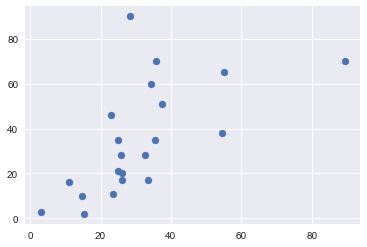

In [43]:
plt.scatter(result.predict(X_test),y_test)
plt.show()

In [44]:
##mean square error
np.mean((result.predict(X_test) - y_test)**2) 

381.47615824201245

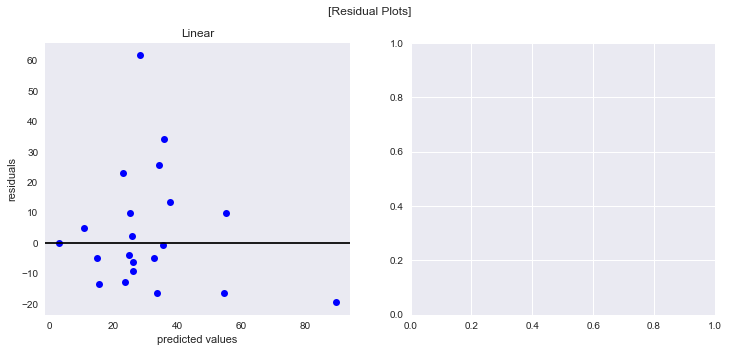

In [45]:
###uthaya
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(result.predict(X_test), y_test -result.predict(X_test), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')



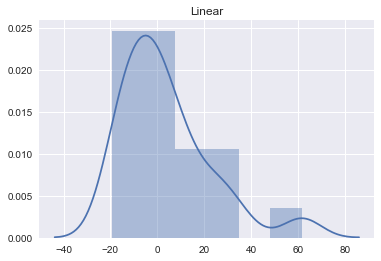

In [46]:
###uthaya
import seaborn as sns

residuals_linear = y_test - result.predict(X_test)

sns.distplot(residuals_linear);
plt.title('Linear')

In [49]:
from scipy.stats import normaltest
normaltest(residuals_linear)

NormaltestResult(statistic=11.223874504946895, pvalue=0.003653983807528081)

In [55]:
from math import sqrt
rmse_ols = sqrt(mean_squared_error(y_test, y_pred))
rmse_ols

19.53141465030151

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(y_test, y_pred)

13.941068045554646

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_test, y_pred)

381.47615824201245

In [56]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

19.53141465030151

In [57]:
#MAPE
y = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
y

68.45777186436194

In [58]:
#uthaya
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [59]:
model.score(X_test, y_test)

0.3439714524861489

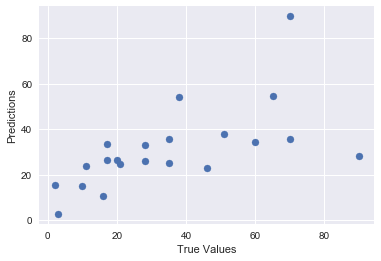

In [60]:
#utahaya
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [62]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(df['total_No_of_medals'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.849, p=0.000
Sample does not look Gaussian (reject H0)


In [63]:
X_test

array([[1.17528631e+08, 1.26434653e+08, 6.20321300e+06, 1.00000000e+00,
        6.53000000e+02],
       [3.26027760e+07, 3.33279540e+07, 1.54907300e+06, 1.00000000e+00,
        7.13600000e+02],
       [7.46662194e+08, 1.40350036e+09, 1.12182810e+07, 1.00000000e+00,
        6.76000000e+02],
       [5.00292635e+08, 1.19086368e+09, 1.22409600e+06, 1.00000000e+00,
        6.06000000e+02],
       [6.23544100e+07, 5.88741170e+07, 1.63870200e+06, 1.00000000e+00,
        7.36500000e+02],
       [5.54138540e+07, 6.20984130e+07, 2.93732100e+06, 1.00000000e+00,
        7.34100000e+02],
       [3.06304400e+06, 4.21326500e+06, 5.45160000e+04, 1.00000000e+00,
        7.00000000e+02],
       [3.06304400e+06, 4.50553300e+06, 2.17740000e+04, 1.00000000e+00,
        7.14500000e+02],
       [1.26000070e+07, 3.84554180e+07, 3.58950000e+04, 1.00000000e+00,
        6.54700000e+02],
       [1.10003284e+08, 1.43163100e+08, 1.78451400e+06, 1.00000000e+00,
        6.99400000e+02],
       [1.10003284e+08, 1.4430

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001581EE80>,
      dtype=object)

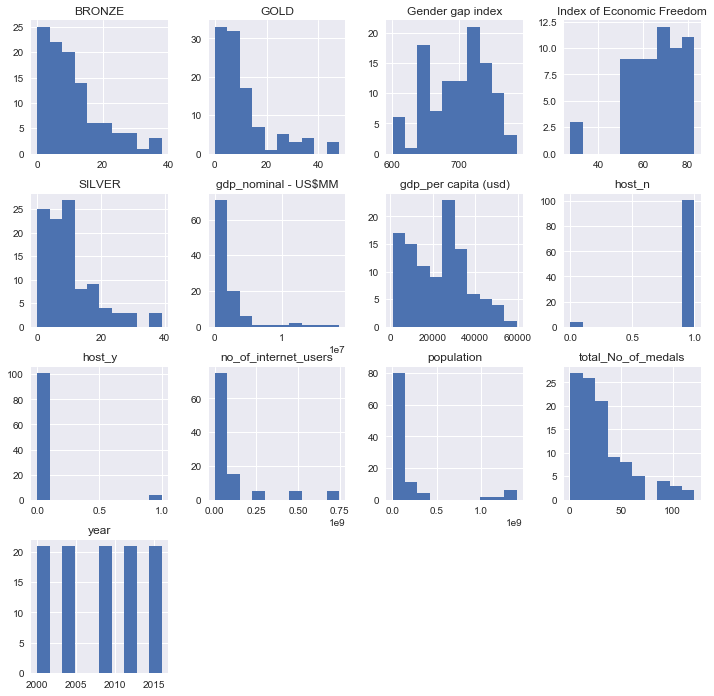

In [64]:
###feature scaling

df_new[df_new.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[12,12])

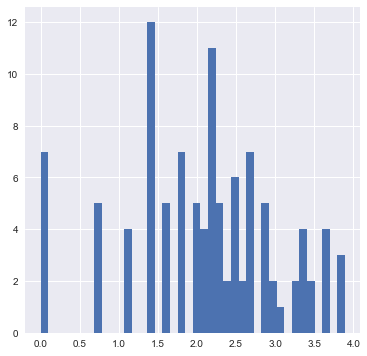

In [67]:
df_new['log_transformed_gold'] = (df['GOLD']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gold'].hist(figsize = (6,6),bins=40)

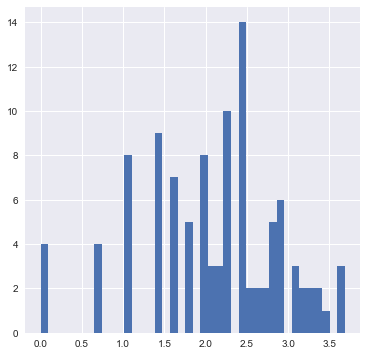

In [69]:
df_new['log_transformed_silver'] = (df['SILVER']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_silver'].hist(figsize = (6,6),bins=40)

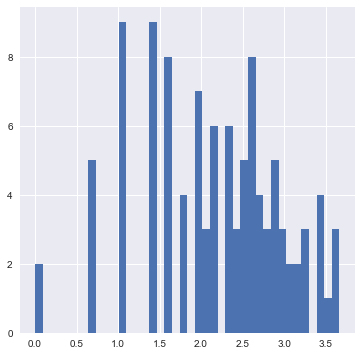

In [70]:
df_new['log_transformed_bronze'] = (df['BRONZE']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_bronze'].hist(figsize = (6,6),bins=40)

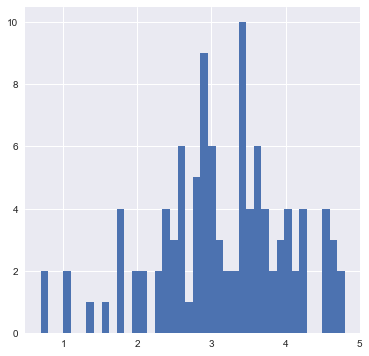

In [71]:
df_new['log_transformed_total'] = (df['total_No_of_medals']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_total'].hist(figsize = (6,6),bins=40)

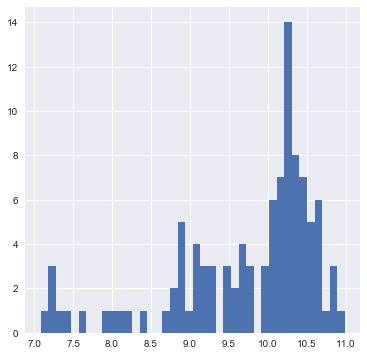

In [73]:
df_new['log_transformed_gdp_cap'] = (df['gdp_per capita (usd)']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gdp_cap'].hist(figsize = (6,6),bins=40)

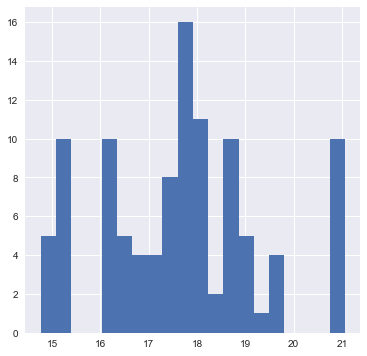

In [74]:
df_new['log_transformed_pop'] = (df['population']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_pop'].hist(figsize = (6,6),bins=20)

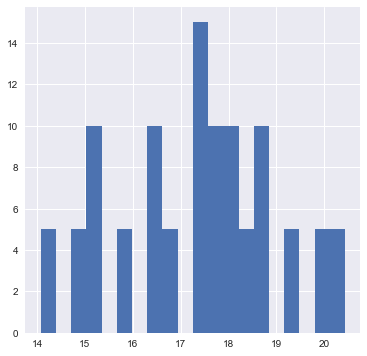

In [75]:
df_new['log_transformed_int'] = (df['no_of_internet_users']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_int'].hist(figsize = (6,6),bins=20)

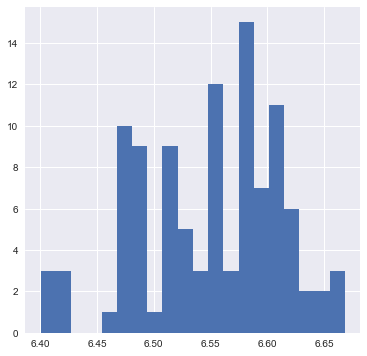

In [76]:
df_new['log_transformed_gg'] = (df['Gender gap index']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gg'].hist(figsize = (6,6),bins=20)

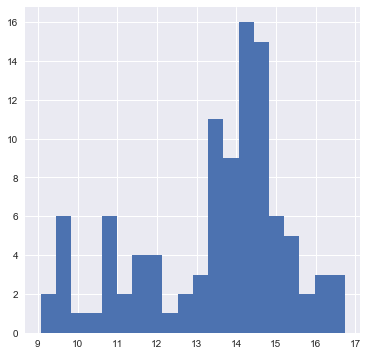

In [77]:
df_new['log_transformed_gdp_n'] = (df['gdp_nominal - US$MM']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gdp_n'].hist(figsize = (6,6),bins=20)

In [78]:
x = df_new[['log_transformed_int','log_transformed_pop','log_transformed_gdp_n','host_n','log_transformed_gg']].values
y = df_new.iloc[:,-1].values

In [79]:
df_new.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'Olympics', 'GOLD',
       'SILVER', 'BRONZE', 'total_No_of_medals', 'log_transformed_gold',
       'log_transformed_silver', 'log_transformed_bronze',
       'log_transformed_total', 'log_transformed_gdp_cap',
       'log_transformed_pop', 'log_transformed_int', 'log_transformed_gg',
       'log_transformed_gdp_n'],
      dtype='object')

In [80]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [81]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new) 


In [87]:
null_counts = df_new.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of Index of Economic Freedom    42
log_transformed_gdp_cap       1
dtype: int64>

In [88]:
#Treating Missing Values
df_new['log_transformed_gdp_n'].fillna(df_new['log_transformed_gdp_n'].median(), inplace=True)

In [89]:
X_test_new = sm.add_constant(X_test_new) 

In [90]:
X_test_new.shape

(21, 6)

In [91]:
result = sm.OLS(y_train_new,X_train_new).fit()
result.summary()

LinAlgError: SVD did not converge

In [92]:
#uthaya
#Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
#Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train)
X_test_minmax=min_max.fit_transform(X_test)

In [93]:
result1 = sm.OLS(y_train,X_train_minmax).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     129.3
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           1.50e-36
Time:                        09:12:36   Log-Likelihood:                -338.78
No. Observations:                  84   AIC:                             687.6
Df Residuals:                      79   BIC:                             699.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           231.5242     35.405      6.539      0.000     161.052     301.997
x2          -184.6932     31.615     -5.842      0.000    -247.620    -121.766
x3            71.4638     10.504      6.803      0.000      50.555      92.372
x4             3.5481      3.739      0.949      0.346      -3.894      10.990
x5            18.6587      6.161      3.029      0.003       6.395      30.922
==============================================================================
Omnibus:                       36.351   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.120
Skew:                           1.476   Prob(JB):                     6.02e-21
Kurtosis:                       7.230   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
y_pred1 = result1.predict(X_test_minmax)

In [95]:
y_pred1

array([ 68.89690857,  33.27338661, 131.35576916,   9.41062115,
        42.84899832,  48.22496202,  16.53139027,  18.25433836,
         8.70614381,  42.44828744,  31.91621679,  30.25355419,
        29.59728253,  34.84431117,  26.63088696,  33.34822168,
        46.14665073,  44.78009903,  42.68014288,  34.23923207,
        50.59002344])

In [96]:
from math import sqrt
rmse_ols = sqrt(mean_squared_error(y_test, y_pred1))
rmse_ols

23.960615703982143

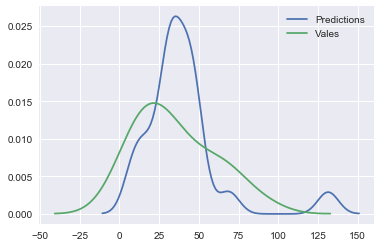

In [97]:
##line plot
sns.kdeplot(y_pred1, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')

In [98]:
##gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

c = GradientBoostingRegressor()

c.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [99]:
pred = c.predict(X_test)
mae = np.mean(abs(pred - y_test))

In [100]:
mae

11.350248964625875

In [101]:
from math import sqrt
rmse_GB = sqrt(mean_squared_error(y_test, pred))
rmse_GB

14.498298036530631

In [103]:
pred

array([25.75946541, 21.35478683, 91.70737701,  2.41634508, 31.82278217,
       37.06944132,  6.96879321, 12.20277134, 10.26899783, 49.43800671,
       54.34064769, 19.78163716, 36.43983653, 18.98832159, 32.84124337,
       24.71818588, 36.15502331, 48.19393299, 32.23641938, 36.43466658,
       36.38498387])

In [104]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51], dtype=int64)

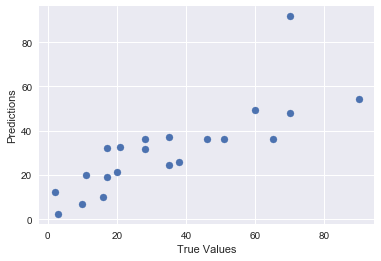

In [105]:
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

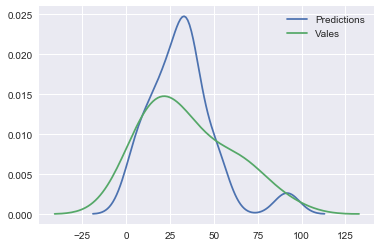

In [106]:
##line plot
sns.kdeplot(pred, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
c = RandomForestRegressor(random_state = 30)
c.fit(X_train,y_train)
pred = c.predict(X_test)
mae = np.mean(abs(pred - y_test))
mean_squared_error(y_test, pred)

304.98285714285714

In [109]:
mae = np.mean(abs(pred - y_test))
mae

13.342857142857142

In [110]:
from math import sqrt
rmse_RF = sqrt(mean_squared_error(y_test, pred))
rmse_RF

17.46375839110405

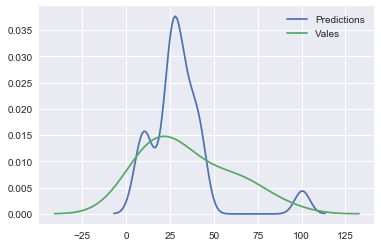

In [111]:
##line plot
sns.kdeplot(pred, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')

In [112]:
from sklearn.neighbors import KNeighborsRegressor
c = KNeighborsRegressor(n_neighbors = 2)

In [113]:
c.fit(X_train,y_train)
pred = c.predict(X_test)
mae = np.mean(abs(pred - y_test))
mean_squared_error(y_test, pred)

87.8452380952381

In [114]:
mae = np.mean(abs(pred - y_test))
mae

6.880952380952381

In [115]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred))
rmse_KNN

9.372579052493402

In [117]:
G = pd.DataFrame({'RMSE': [rmse_KNN,rmse_RF,rmse_GB,rmse_ols],'model_name':['K-nearest Neighbors','Random Forest','Gradient Boosting','Ordinary LS']})

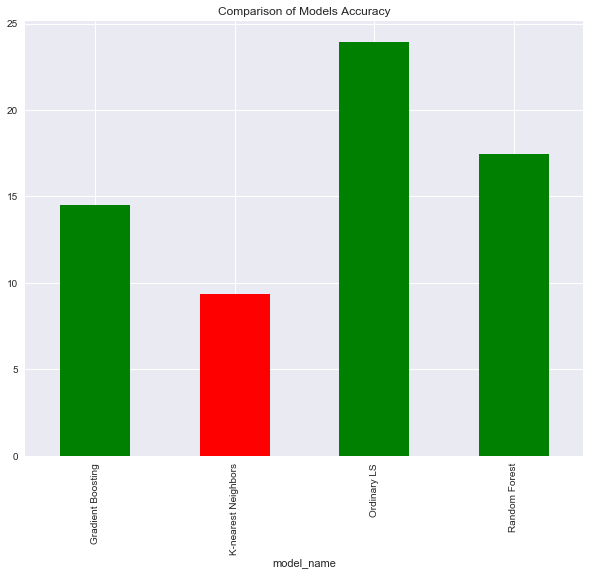

In [118]:
ax = plt.subplot()

ax.set_title('Comparison of Models Accuracy')
G.groupby('model_name').mean()['RMSE'].plot(kind='bar',figsize=(10,8), ax = ax,color = ('green','red','green','green'))

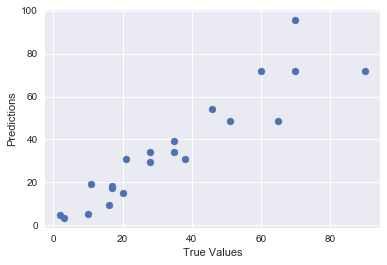

In [121]:
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

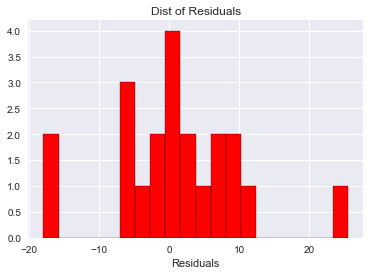

In [122]:
figsize = (8,8)

r = pred - y_test
plt.hist(r,color = 'red', bins = 20,edgecolor = 'black')
plt.xlabel('Residuals')
plt.title('Dist of Residuals')

In [123]:
###Hyperparameter tunign


In [124]:
##visualise  RMSE


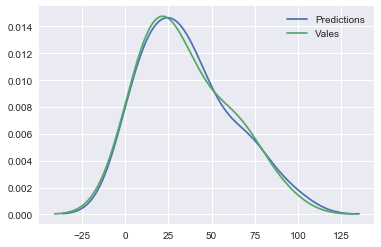

In [125]:
##line plot
sns.kdeplot(pred, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')


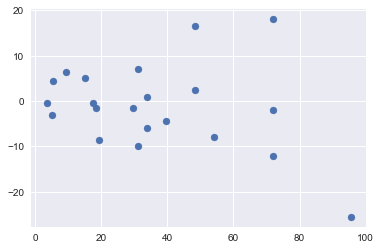

In [126]:
##residuals - fitted values
residual = y_test - pred
plt.scatter(pred,residual)

In [127]:
df_pivot= df.pivot_table(index = "country",columns = "year",values = "total_No_of_medals",aggfunc = 'sum')

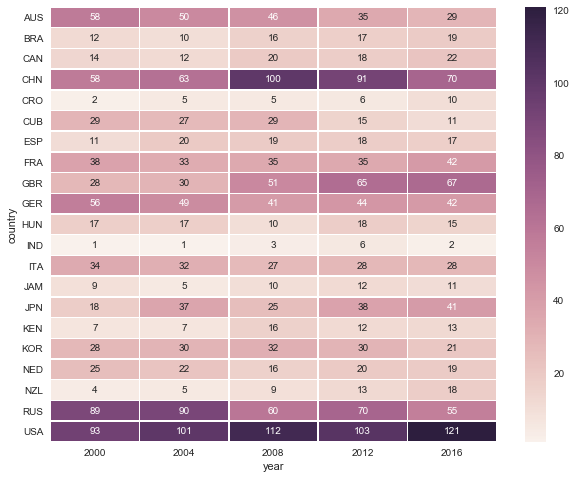

In [128]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5, ax=ax)

In [129]:
##lasso regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

In [131]:
regr = Lasso(alpha=0.5)
m2 = regr.fit(X_std,y_train)

In [133]:
m2.coef_

array([ 22.28040924, -17.89612047,  17.52857573,  -3.5302497 ,
         1.76376619])

In [134]:
y_pred4 = m2.predict(X_test)

In [137]:
y_pred4

array([ 4.64630883e+08,  1.57116441e+08, -8.28463065e+09, -1.01436575e+10,
        3.64388921e+08,  1.74811041e+08, -6.19837434e+06, -1.20027327e+07,
       -4.06839110e+08, -7.98646488e+07, -1.20485099e+08,  1.21358574e+08,
        1.07837935e+08,  2.54883793e+07,  1.67261888e+08,  9.15285203e+07,
        3.05199043e+08, -6.48743232e+07, -7.45549346e+08, -2.17643080e+08,
        3.43596414e+08])

In [138]:
###doing regression for Gold, silver and bronze

In [139]:
from sklearn.neighbors import KNeighborsRegressor
c = KNeighborsRegressor(n_neighbors = 2)

In [140]:
df_new.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'Olympics', 'GOLD',
       'SILVER', 'BRONZE', 'total_No_of_medals', 'log_transformed_gold',
       'log_transformed_silver', 'log_transformed_bronze',
       'log_transformed_total', 'log_transformed_gdp_cap',
       'log_transformed_pop', 'log_transformed_int', 'log_transformed_gg',
       'log_transformed_gdp_n'],
      dtype='object')

In [273]:
##for gold medal
y = df_new.iloc[:,11].values

In [274]:
y

array([46, 27, 26, 19, 17, 12, 10,  9,  8,  8,  8,  8,  7,  7,  6,  6,  5,
        5,  4,  4,  0, 46, 29, 38, 20, 11,  7, 11, 13,  8,  8,  6,  8,  3,
        4,  2,  4,  3,  5,  6,  2,  0, 36, 19, 48, 24, 16,  9, 11, 13,  8,
       14,  7,  3,  3,  5,  6,  5,  0,  3,  3,  3,  1, 36,  9, 32, 28, 13,
       16, 11,  9, 10, 17,  4,  8,  5,  3,  1,  2,  1,  9,  3,  3,  0, 37,
       11, 28, 32, 13,  5, 13,  8, 13, 16, 12,  8,  0,  3,  2,  0,  1, 11,
        1,  3,  0], dtype=int64)

In [275]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [277]:
gold_model = c.fit(X_train,y_train)
pred_gold = c.predict(X_test)
mae = np.mean(abs(pred_gold - y_test))
mean_squared_error(y_test, pred_gold)

27.083333333333332

In [226]:
mae = np.mean(abs(pred_gold - y_test))
mae

3.4047619047619047

In [227]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred_gold))
rmse_KNN

5.204164998665331

In [228]:
pred_gold

array([12.5,  2.5, 43. ,  0. , 11. , 11. ,  1.5,  0.5,  1.5, 25.5, 25.5,
        4. , 16.5,  4.5, 13. , 12.5, 18. , 25.5,  5. ,  9. , 18. ])

In [223]:
y_test

array([ 7,  3, 26,  1, 11, 11,  5,  1,  6, 24, 28,  3, 14,  7,  9,  8, 29,
       20,  3,  8, 19], dtype=int64)

In [229]:
##for silver medal
y = df_new.iloc[:,12].values

In [230]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [231]:
c.fit(X_train,y_train)
pred_silver = c.predict(X_test)
mae = np.mean(abs(pred_silver - y_test))
mean_squared_error(y_test, pred_silver)

21.083333333333332

In [232]:
mae = np.mean(abs(pred_silver - y_test))
mae

3.5952380952380953

In [233]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred_silver))
rmse_KNN

4.591659104651971

In [234]:
pred_silver

array([ 8. ,  5.5, 26.5,  1.5, 11.5, 10. ,  1.5,  2. ,  4. , 22.5, 22.5,
       11. , 20.5, 10.5, 10. , 13.5, 16. , 22.5,  5. , 10. , 16. ])

In [235]:
y_test

array([14,  9, 18,  0, 10, 11,  3,  0,  4, 13, 26,  3, 15,  4,  3, 15, 17,
       20,  5, 12, 13], dtype=int64)

In [236]:
##for bronze medal
y = df_new.iloc[:,13].values

In [237]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [238]:
c.fit(X_train,y_train)
pred_bronze = c.predict(X_test)
mae = np.mean(abs(pred_bronze - y_test))
mean_squared_error(y_test, pred_bronze)

14.75

In [239]:
mae = np.mean(abs(pred_bronze - y_test))
mae

2.5476190476190474

In [240]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred_bronze))
rmse_KNN

3.840572873934304

In [241]:
pred_bronze

array([10.5,  7. , 26. ,  2. , 11.5, 13. ,  2.5,  2.5,  4. , 24. , 24. ,
        4.5, 17. ,  3.5,  8. , 13.5, 14.5, 24. ,  7.5, 10.5, 14.5])

In [242]:
y_test

array([17,  8, 26,  2,  7, 13,  2,  1,  6, 23, 36,  5, 17,  6,  9, 12, 19,
       30,  9,  8, 19], dtype=int64)

In [ ]:
###prediction on New test data  - test data 2020 olympics

##FIRST we will predict count of individual medals and then total medals tally

In [141]:
# Load spreadsheet
xl = pd.ExcelFile('test_data_2020_olympics.xlsx')

# Load a sheet into a DataFrame by name: df1
df_test = xl.parse('Sheet1')

In [142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
country                      21 non-null object
year                         21 non-null int64
gdp_nominal - US$MM          20 non-null float64
gdp_per capita (usd)         0 non-null float64
population                   21 non-null int64
host_y                       21 non-null int64
host_n                       21 non-null int64
Index of Economic Freedom    0 non-null float64
no_of_internet_users         21 non-null int64
Gender gap index             21 non-null int64
GOLD                         0 non-null float64
SILVER                       0 non-null float64
BRONZE                       0 non-null float64
total_No_of_medals           0 non-null float64
dtypes: float64(7), int64(6), object(1)
memory usage: 2.4+ KB


In [143]:
##prediction of gold medals
gold = df_test.iloc[:,np.r_[2:3,4:5,6:7,8:10]]


In [144]:
null_counts = gold.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of gdp_nominal - US$MM    1
dtype: int64>

In [145]:
#Treating Missing Values
df_test['gdp_nominal - US$MM'].fillna(df_test['gdp_nominal - US$MM'].median(), inplace=True)

In [146]:
result = sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           2.76e-38
Time:                        09:36:43   Log-Likelihood:                -334.51
No. Observations:                  84   AIC:                             679.0
Df Residuals:                      79   BIC:                             691.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.831e-07   4.57e-08      6.195      0.000    1.92e-07    3.74e-07
x2         -1.289e-07   2.24e-08     -5.759      0.000   -1.73e-07   -8.44e-08
x3          4.083e-06   5.31e-07      7.687      0.000    3.03e-06    5.14e-06
x4           -18.3448      7.556     -2.428      0.017     -33.385      -3.304
x5             0.0466      0.011      4.304      0.000       0.025       0.068
==============================================================================
Omnibus:                       35.911   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.244
Skew:                           1.294   Prob(JB):                     6.36e-28
Kurtosis:                       8.393   Cond. No.                     2.33e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
#total_p = result.predict(df_test.iloc[:,np.r_[2:3,4:5,6:7,8:10]].values)
total_p = df_test[['no_of_internet_users','population','gdp_nominal - US$MM','host_n','Gender gap index']].values
result = sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           2.76e-38
Time:                        09:36:54   Log-Likelihood:                -334.51
No. Observations:                  84   AIC:                             679.0
Df Residuals:                      79   BIC:                             691.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.831e-07   4.57e-08      6.195      0.000    1.92e-07    3.74e-07
x2         -1.289e-07   2.24e-08     -5.759      0.000   -1.73e-07   -8.44e-08
x3          4.083e-06   5.31e-07      7.687      0.000    3.03e-06    5.14e-06
x4           -18.3448      7.556     -2.428      0.017     -33.385      -3.304
x5             0.0466      0.011      4.304      0.000       0.025       0.068
==============================================================================
Omnibus:                       35.911   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.244
Skew:                           1.294   Prob(JB):                     6.36e-28
Kurtosis:                       8.393   Cond. No.                     2.33e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
pred_total = result.predict(total_p)

In [149]:
pred_total

array([187.09879614,  48.11981297, 300.68026673,  52.37688243,
        59.19379528,  86.63261045,  48.05035702,  32.94953324,
        38.95759577,  28.66972577,  24.87021818,  16.04731973,
        65.3463935 ,  35.34678996,  26.67147502,  15.57379347,
        16.12289268,  25.3564405 ,  20.7159978 ,  35.10556885,
       157.6905878 ])